# Truss Example 1

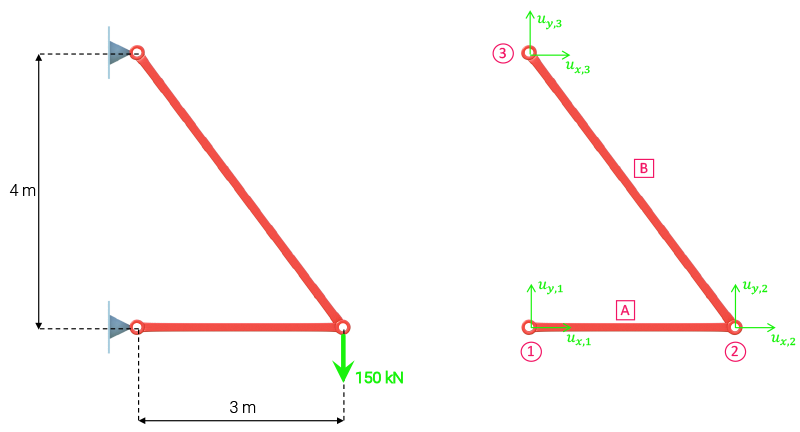

In [1]:
#DEPENDENCIES
import copy #Allows us to create copies of objects in memory
import math #Math functionality
import numpy as np #Numpy for working with arrays
import matplotlib.pyplot as plt #Plotting functionality 

#Constants
E = 200*10**9 #(N/m^2)
A = 0.005 #(m^2)

## Element A (nodes 1 to 2)

In [2]:
theta = 0#(rads) #Angle of orientation for element 1
L = 3 #(m) Length of element 1

#Top left quadrant of global stiffness matrix element 1
e11 = math.cos(theta)**2
e12 = math.cos(theta)*math.sin(theta)
e21 = math.cos(theta)*math.sin(theta)
e22 = math.sin(theta)**2
K11_12 = (E*A/L)*np.array([[e11,e12],[e21,e22]])

#Top right quadrant of global stiffness matrix element 1
e11 = -math.cos(theta)**2
e12 = -math.cos(theta)*math.sin(theta)
e21 = -math.cos(theta)*math.sin(theta)
e22 = -math.sin(theta)**2
K12_12 = (E*A/L)*np.array([[e11,e12],[e21,e22]])

#Bottom left quadrant of global stiffness matrix element 1
e11 = -math.cos(theta)**2
e12 = -math.cos(theta)*math.sin(theta)
e21 = -math.cos(theta)*math.sin(theta)
e22 = -math.sin(theta)**2
K21_12 = (E*A/L)*np.array([[e11,e12],[e21,e22]])

#Bottom right quadrant of global stiffness matrix element 1
e11 = math.cos(theta)**2
e12 = math.cos(theta)*math.sin(theta)
e21 = math.cos(theta)*math.sin(theta)
e22 = math.sin(theta)**2
K22_12 = (E*A/L)*np.array([[e11,e12],[e21,e22]])

#Concatenate K11 and K12 along vertical axis
top = np.concatenate((K11_12, K12_12), axis=1)

#Concategate K21 and K22 along vertical axis
btm = np.concatenate((K21_12, K22_12), axis=1)

#Concatenate top and btm along horizontal axis
K1g = np.concatenate((top,btm), axis=0)

print("Global stiffness matrix for element 1:")
print(np.round(K1g,3))

Global stiffness matrix for element 1:
[[ 3.33333333e+08  0.00000000e+00 -3.33333333e+08 -0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00]
 [-3.33333333e+08 -0.00000000e+00  3.33333333e+08  0.00000000e+00]
 [-0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00]]


## Element B (nodes 2 to 3)

In [3]:
theta = 2.2143 #(rads) Angle of orientation for element 1
L = 5 #(m) Length of element 1

#Top left quadrant of global stiffness matrix element 1
e11 = math.cos(theta)**2
e12 = math.cos(theta)*math.sin(theta)
e21 = math.cos(theta)*math.sin(theta)
e22 = math.sin(theta)**2
K11_23 = (E*A/L)*np.array([[e11,e12],[e21,e22]])

#Top right quadrant of global stiffness matrix element 1
e11 = -math.cos(theta)**2
e12 = -math.cos(theta)*math.sin(theta)
e21 = -math.cos(theta)*math.sin(theta)
e22 = -math.sin(theta)**2
K12_23 = (E*A/L)*np.array([[e11,e12],[e21,e22]])

#Bottom left quadrant of global stiffness matrix element 1
e11 = -math.cos(theta)**2
e12 = -math.cos(theta)*math.sin(theta)
e21 = -math.cos(theta)*math.sin(theta)
e22 = -math.sin(theta)**2
K21_23 = (E*A/L)*np.array([[e11,e12],[e21,e22]])

#Bottom right quadrant of global stiffness matrix element 1
e11 = math.cos(theta)**2
e12 = math.cos(theta)*math.sin(theta)
e21 = math.cos(theta)*math.sin(theta)
e22 = math.sin(theta)**2
K22_23 = (E*A/L)*np.array([[e11,e12],[e21,e22]])

#Concatenate K11 and K12 along vertical axis
top = np.concatenate((K11_23, K12_23), axis=1)

#Concatenate K21 and K22 along vertical axis
btm = np.concatenate((K21_23, K22_23), axis=1)

#Concatenate top and btm along horizontal axis
K2g = np.concatenate((top,btm), axis=0)

print("Global stiffness matrix for element 2:")
print(np.round(K2g,3))


Global stiffness matrix for element 2:
[[ 7.20004924e+07 -9.60001436e+07 -7.20004924e+07  9.60001436e+07]
 [-9.60001436e+07  1.27999508e+08  9.60001436e+07 -1.27999508e+08]
 [-7.20004924e+07  9.60001436e+07  7.20004924e+07 -9.60001436e+07]
 [ 9.60001436e+07 -1.27999508e+08 -9.60001436e+07  1.27999508e+08]]


## Primary stiffness matrix for the structure

In [4]:
k11 = K11_12
k12 = K12_12
k13 = np.zeros([2,2])

k21 = K21_12
k22 = K22_12 + K11_23
k23 = K12_23

k31 = np.zeros([2,2])
k32 = K21_23
k33 = K22_23

r1 = np.concatenate((k11,k12,k13), axis=1)
r2 = np.concatenate((k21,k22,k23), axis=1)
r3 = np.concatenate((k31,k32,k33), axis=1)
Kp = np.concatenate((r1,r2,r3), axis=0)
print('The primary stiffness matrix for the structure is:')
print(np.round(Kp,3))

The primary stiffness matrix for the structure is:
[[ 3.33333333e+08  0.00000000e+00 -3.33333333e+08 -0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-3.33333333e+08 -0.00000000e+00  4.05333826e+08 -9.60001436e+07
  -7.20004924e+07  9.60001436e+07]
 [-0.00000000e+00 -0.00000000e+00 -9.60001436e+07  1.27999508e+08
   9.60001436e+07 -1.27999508e+08]
 [ 0.00000000e+00  0.00000000e+00 -7.20004924e+07  9.60001436e+07
   7.20004924e+07 -9.60001436e+07]
 [ 0.00000000e+00  0.00000000e+00  9.60001436e+07 -1.27999508e+08
  -9.60001436e+07  1.27999508e+08]]


## Reduce the stiffness matrix (structure stiffness matrix)
i.e. impose known displacements (0 at supports) and extract the relevant portion of the stiffness matrix


In [5]:
Kp_red = copy.copy(Kp) # Make a copy of Kp so the copy can be edited, leaving the original unchanged

#Impose fact that U_x1 = 0
Kp_red[:,0] = 0 #All elements in column 0
Kp_red[0,:] = 0 #All elements in row 0
Kp_red[0,0] = 1 #First diagonal 
print(np.round(Kp_red,3))

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00 -0.00000000e+00  4.05333826e+08 -9.60001436e+07
  -7.20004924e+07  9.60001436e+07]
 [ 0.00000000e+00 -0.00000000e+00 -9.60001436e+07  1.27999508e+08
   9.60001436e+07 -1.27999508e+08]
 [ 0.00000000e+00  0.00000000e+00 -7.20004924e+07  9.60001436e+07
   7.20004924e+07 -9.60001436e+07]
 [ 0.00000000e+00  0.00000000e+00  9.60001436e+07 -1.27999508e+08
  -9.60001436e+07  1.27999508e+08]]


In [6]:
#Impose fact that U_y1 = 0
Kp_red[:,1] = 0
Kp_red[1,:] = 0
Kp_red[1,1] = 1
print(np.round(Kp_red,3))

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.05333826e+08 -9.60001436e+07
  -7.20004924e+07  9.60001436e+07]
 [ 0.00000000e+00  0.00000000e+00 -9.60001436e+07  1.27999508e+08
   9.60001436e+07 -1.27999508e+08]
 [ 0.00000000e+00  0.00000000e+00 -7.20004924e+07  9.60001436e+07
   7.20004924e+07 -9.60001436e+07]
 [ 0.00000000e+00  0.00000000e+00  9.60001436e+07 -1.27999508e+08
  -9.60001436e+07  1.27999508e+08]]


In [7]:
#Impose fact that U_x3 = 0
Kp_red[:,4] = 0
Kp_red[4,:] = 0
Kp_red[4,4] = 1
print(np.round(Kp_red,3))

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.05333826e+08 -9.60001436e+07
   0.00000000e+00  9.60001436e+07]
 [ 0.00000000e+00  0.00000000e+00 -9.60001436e+07  1.27999508e+08
   0.00000000e+00 -1.27999508e+08]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  9.60001436e+07 -1.27999508e+08
   0.00000000e+00  1.27999508e+08]]


In [8]:
#Impose fact that U_y3 = 0
Kp_red[:,5] = 0
Kp_red[5,:] = 0
Kp_red[5,5] = 1
print(np.round(Kp_red,3))

[[ 1.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  1.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  4.05333826e+08 -9.60001436e+07
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00 -9.60001436e+07  1.27999508e+08
   0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   1.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
   0.00000000e+00  1.00000000e+00]]


So, the reduced force displacement relationship is as follows
\begin{equation}
\begin{bmatrix}
F_{x2}\\
F_{y2}
\end{bmatrix} = 
\begin{bmatrix}
0.405 & -0.096\\
-0.096 & 0.128
\end{bmatrix}
\begin{bmatrix}
U_{x2}\\
U_{y2}
\end{bmatrix}
\end{equation}

Now if the external force is 150 kN applied vertically downwards at node 2, the force vector is given by $[0, -150000]^T$ and the displacements can be identified by inverting the structure stiffness matrix and multiplying the force vector by it,
\begin{equation}
\begin{bmatrix}
U_{x2}\\
U_{y2}
\end{bmatrix} = 
\begin{bmatrix}
0.405 & -0.096\\
-0.096 & 0.128
\end{bmatrix}^{-1}
\begin{bmatrix}
0\\-150000
\end{bmatrix}
\end{equation}

In [9]:
Ks = Kp[2:4,2:4] #Extracting relevant portion from structure stiffness matrix
Ks = np.matrix(Ks) # Convert Ks from numpy.ndarray to numpy.matrix to use built in inverter function
U2 = Ks.I*np.array([[0],[-150000]])
U_x2 = U2[0,0]
U_y2 = U2[1,0]
print("The horizontal displacement at node 2 is {one} m (to the left)".format(one=round(U_x2,10)))
print("The vertical displacement at node 2 is {one} m (downwards)".format(one=round(U_y2,10)))

The horizontal displacement at node 2 is -0.0003375018 m (to the left)
The vertical displacement at node 2 is -0.0014250072 m (downwards)


## Determine the reaction forces

In [14]:
#Construct the global displacement vector
UG = np.array([[0,0,U_x2, U_y2, 0, 0]]) #Note double brackets here forces a (1,6) size vector
FG = np.matmul(Kp,UG.T)
print(np.round(FG))

[[ 112501.]
 [      0.]
 [      0.]
 [-150000.]
 [-112501.]
 [ 150000.]]


## Forces: Element A (nodes 1 to 2)

In [16]:
theta = 0 #(rads) Angle of orientation for element 1
L = 3;
#Transformation matrix
c = math.cos(theta)
s = math.sin(theta)
T = np.array([[c,s,0,0],[0,0,c,s]])
disp = np.array([[0,0,U_x2,U_y2]]).T
disp_local = np.matmul(T,disp)
F12 = (A*E/L)*(disp_local[1]-disp_local[0])[0]
print("The force in element 1 is {one} kN (compression)".format(one=(np.round(F12/1000,1))))

The force in element 1 is -112.5 kN (compression)


## Forces: Element B (nodes 2 to 3)

In [17]:
theta = 2.2143 #(rads) Angle of orientation for element 1
L = 5;
#Transformation matrix
c = math.cos(theta)
s = math.sin(theta)
T = np.array([[c,s,0,0],[0,0,c,s]])
disp = np.array([[U_x2,U_y2,0,0]]).T
disp_local = np.matmul(T,disp)
F23 = (A*E/L)*(disp_local[1]-disp_local[0])[0]
print("The force in element 2 is {one} kN (tension)".format(one=(np.round(F23/1000,1))))

The force in element 2 is 187.5 kN (tension)


## Plotting (optional)

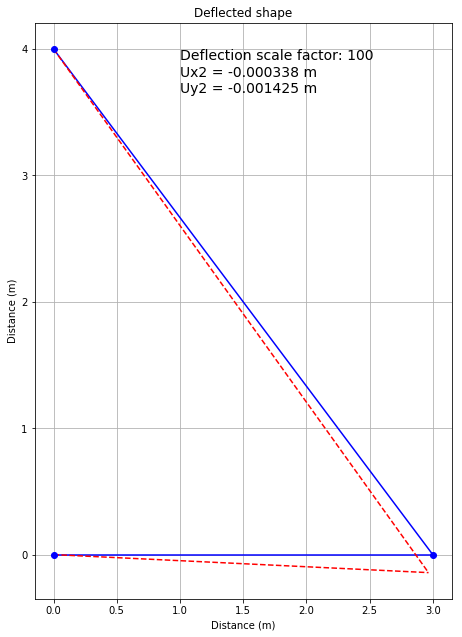

In [18]:
xFactor = 100
label = "Deflection scale factor: " + str(xFactor) + "\nUx2 = "+str(round(U_x2,6)) +" m\nUy2 = "+str(round(U_y2,6))+" m"

fig = plt.figure() 
axes = fig.add_axes([0,0,2,2]) 
fig.gca().set_aspect('equal', adjustable='box')

#Plot the undeformed shape
axes.plot([0,3],[0,0],'b')
axes.plot([0,3],[4,0],'b')
#Plot deformed shape
axes.plot([0,3+U_x2*xFactor],[0,0+U_y2*xFactor],'--r')
axes.plot([0,3+U_x2*xFactor],[4,0+U_y2*xFactor],'--r')

axes.plot([0],[0],'bo')
axes.plot([3],[0],'bo')
axes.plot([0],[4],'bo')

plt.text(1, 4, label, fontsize=14,verticalalignment='top',)
axes.set_xlabel('Distance (m)')
axes.set_ylabel('Distance (m)')
axes.set_title('Deflected shape')
axes.grid()
plt.show()